In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Problem Definition**

In this project, we aim to automatically group Wikipedia biographical articles using unsupervised machine learning techniques. Given a dataset of people’s biographies, our goal is to apply clustering algorithms (such as K-Means, Hierarchical Clustering, and Gaussian Mixture Models) to organize documents into meaningful groups based on their textual content.

## **2. Data Collection & loading and Analyzing**

In [5]:
from load_data import load_wikipedia_data

In [6]:
# Load the data
path = '/content/people_wiki.csv'
data = load_wikipedia_data(path)
data.head(5)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     2137 non-null   object
 1   name    2137 non-null   object
 2   text    2137 non-null   object
dtypes: object(3)
memory usage: 50.2+ KB


In [8]:
data.isnull().sum()

,0
URI,0
name,0
text,0


## **3. Data Preprocessing & Cleaning**

In [9]:
from data_preprocessing import clean_text

In [10]:
# Preprocess the data
data = data.drop(columns=["URI"])
data.head(5)

,name,text
0,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [11]:
data_preprocessed = data.copy()

# Apply the preprocessing function to the 'text' column
data_preprocessed.loc[:, "text"] = data_preprocessed["text"].apply(clean_text)


In [12]:
data_preprocessed.head()

,name,text
0,Digby Morrell,digby morrell bear october australian rule...
1,Alfred J. Lewy,alfred j lewy aka sandy lewy graduate universi...
2,Harpdog Brown,harpdog brown singer harmonica player active c...
3,Franz Rottensteiner,franz rottensteiner bear waidmannsfeld low aus...
4,G-Enka,henry krvit bear december tallinn well kno...


## **4. Feature Extraction**

#### Shows the most important words across the dataset

In [13]:
from feature_extraction import feature_extraction

In [14]:
# vectorizer words
X_tfidf = feature_extraction(data_preprocessed)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [15]:
data_matrix = X_tfidf[0]
data_matrix.shape

(2137, 32)

<ipython-input-16-d0cffb83a4ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="viridis")


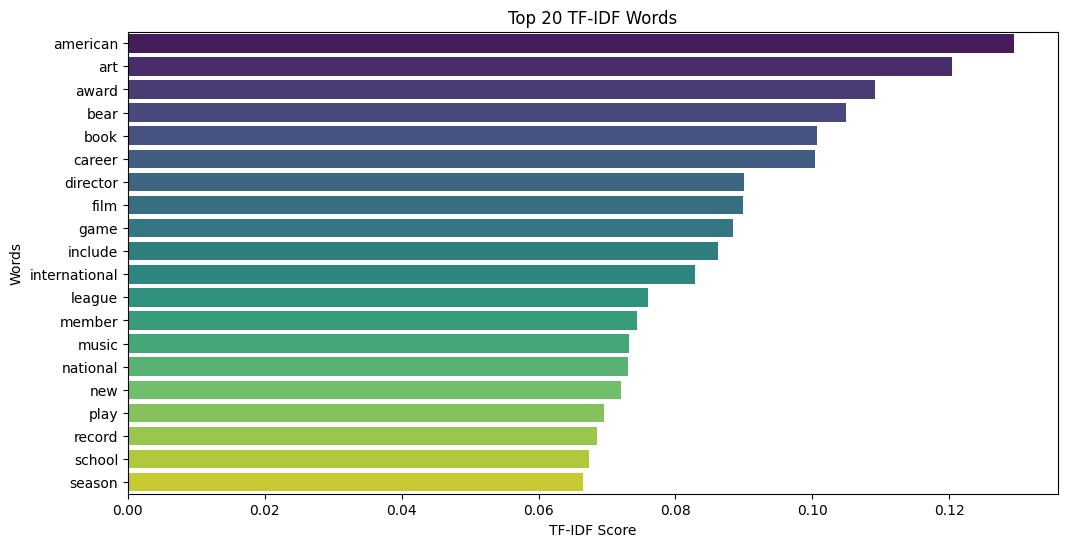

In [16]:
top_words = list(X_tfidf[1])[:20]
top_scores = list(X_tfidf[2].values())[:20]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_scores, y=top_words, palette="viridis")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.title(f"Top {20} TF-IDF Words")
plt.show()

## **5. Apply Clustering Algorithms**

In [19]:
from clustering import optimal_cluster_count
from clustering import KMeans_clustring
from clustering import hierarchical_clustering
from clustering import gaussian_mixture_model

### choose the optimal number of cluster

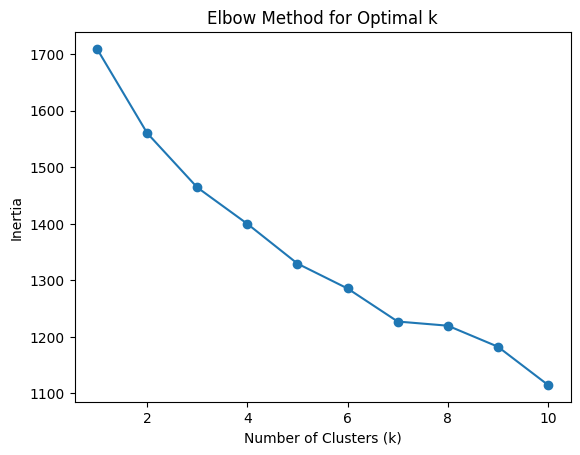

In [20]:
inertia = optimal_cluster_count(data_matrix)[1]
# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
optimal_k = int(optimal_cluster_count(data_matrix)[0])
print("The optimal the number of clusters is: ", optimal_k)

The optimal the number of clusters is:  5


### Apply KMeans clustering

In [22]:
# Apply KMeans clustering with the optimal k
kmeans = KMeans_clustring(data_matrix, optimal_k)

In [23]:
kmeans_labels = kmeans.predict(data_matrix.toarray())
data_preprocessed['KMeans_Clusters'] = kmeans_labels
data_preprocessed[["name", "KMeans_Clusters"]].head()

,name,KMeans_Clusters
0,Digby Morrell,0
1,Alfred J. Lewy,2
2,Harpdog Brown,2
3,Franz Rottensteiner,2
4,G-Enka,3


### Apply Hierarchical Clustering

In [24]:
hierarchical, hierarchical_labels = hierarchical_clustering(data_matrix, optimal_k)

In [25]:
data_preprocessed['hierarchical_Clusters'] = hierarchical_labels
data_preprocessed[["name", "hierarchical_Clusters"]].head()

,name,hierarchical_Clusters
0,Digby Morrell,3
1,Alfred J. Lewy,13
2,Harpdog Brown,7
3,Franz Rottensteiner,6
4,G-Enka,20


### Apply Gaussian Mixture Model Clustering

In [26]:
gmm = gaussian_mixture_model(data_matrix, optimal_k)

In [27]:
gmm_labels = gmm.predict(data_matrix.toarray())
data_preprocessed['gmm_Clusters'] = gmm_labels
data_preprocessed[["name", "gmm_Clusters"]].head()

,name,gmm_Clusters
0,Digby Morrell,0
1,Alfred J. Lewy,1
2,Harpdog Brown,2
3,Franz Rottensteiner,1
4,G-Enka,0


## **6. Evaluate the Clustering Performance**

In [28]:
from model_evaluate import silhouette_metric

In [29]:
# evaluate Kmeans model
score = silhouette_metric(data_matrix, kmeans_labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.1200313708269857


In [30]:
# evaluate hierarchical model
score = silhouette_metric(data_matrix, hierarchical_labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.10534195735841702


In [31]:
# evaluate gmm model
score = silhouette_metric(data_matrix, gmm_labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.03376764326787724


## **7. Visualize Results**

In [32]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

In [33]:
# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_matrix.toarray())

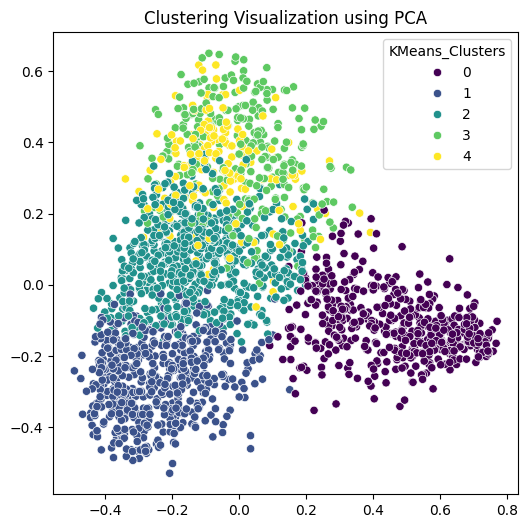

In [34]:
# Plot Kmens clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data_preprocessed["KMeans_Clusters"], palette="viridis")
plt.title("Clustering Visualization using PCA")
plt.show()

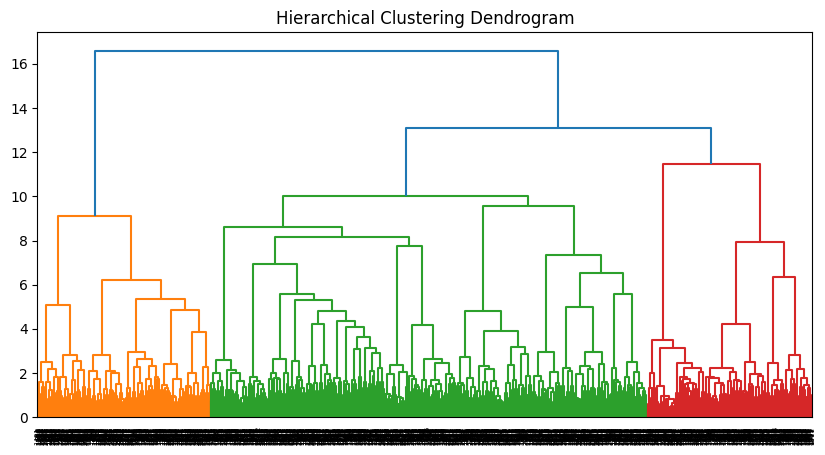

In [35]:
# Plot hierarchical dendrogram
plt.figure(figsize=(10, 5))
dendrogram(hierarchical)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


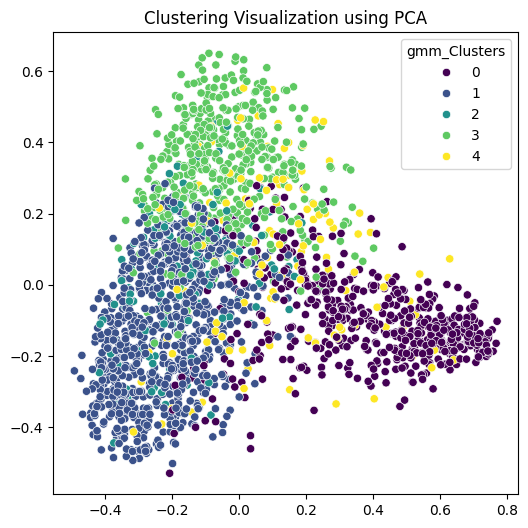

In [36]:
# Plot gmm clusters
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data_preprocessed["gmm_Clusters"], palette="viridis")
plt.title("Clustering Visualization using PCA")
plt.show()

In [38]:
from sklearn.manifold import TSNE

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(data_matrix.toarray())

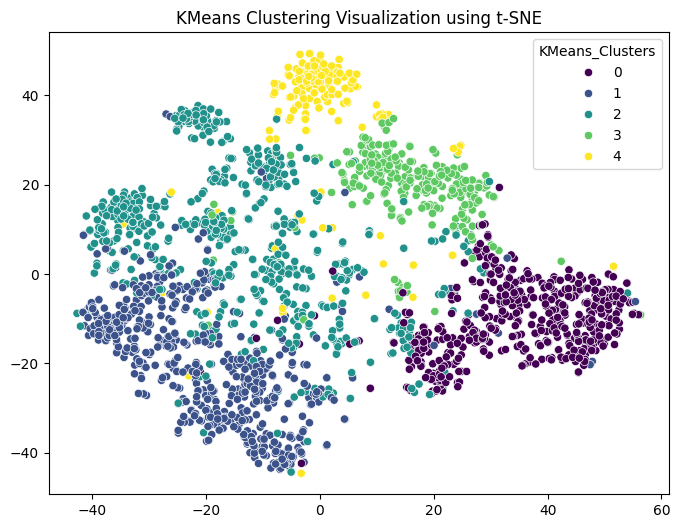

In [39]:
# Plot KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data_preprocessed["KMeans_Clusters"], palette="viridis", legend='full')
plt.title("KMeans Clustering Visualization using t-SNE")
plt.show()

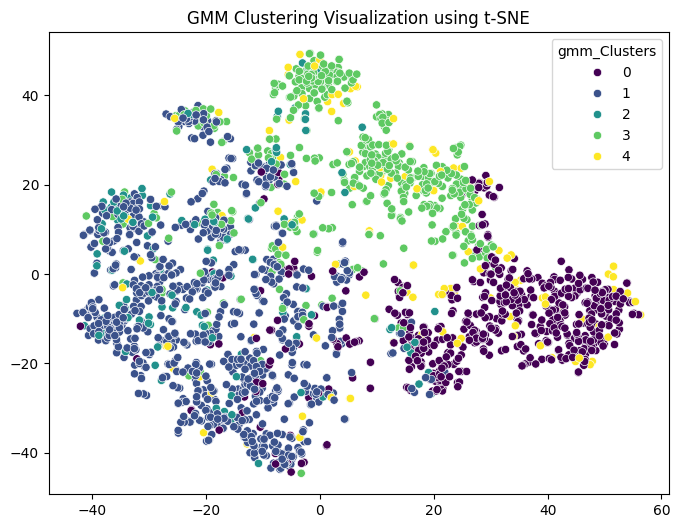

In [40]:
# Plot GMM clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=data_preprocessed["gmm_Clusters"], palette="viridis", legend='full')
plt.title("GMM Clustering Visualization using t-SNE")
plt.show()